# Project: Wine Quality Prediction



### 1. Importing the Libraries

In [236]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 2.Data Collection

In [237]:
#load the dataset
df=pd.read_csv('winequality-red.csv')

In [238]:
df.shape

(1599, 12)

In [239]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [240]:
# checking for missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3.Data Analysis and Visualization

In [241]:
# statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


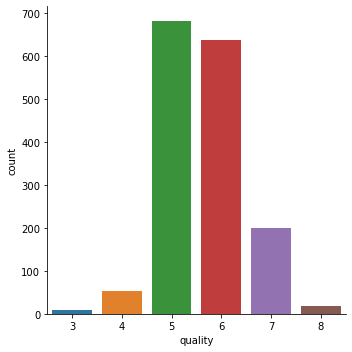

In [242]:
# number of values for each quality
sns.catplot(x='quality',data=df,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

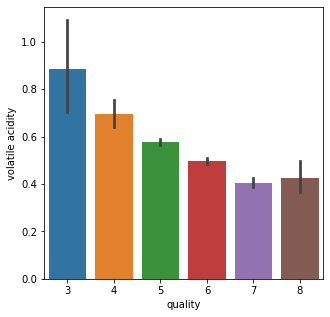

In [243]:
# volatile acidity vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

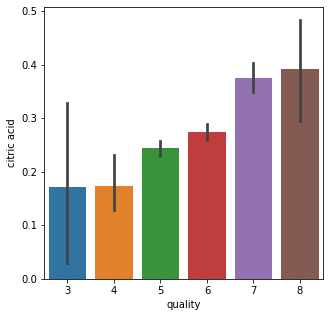

In [244]:
# citric acid vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)

### 4. Correlation

#### 1.Positive Correlation
#### 2.Negative Correlation

In [245]:
correlation=df.corr()

<AxesSubplot:>

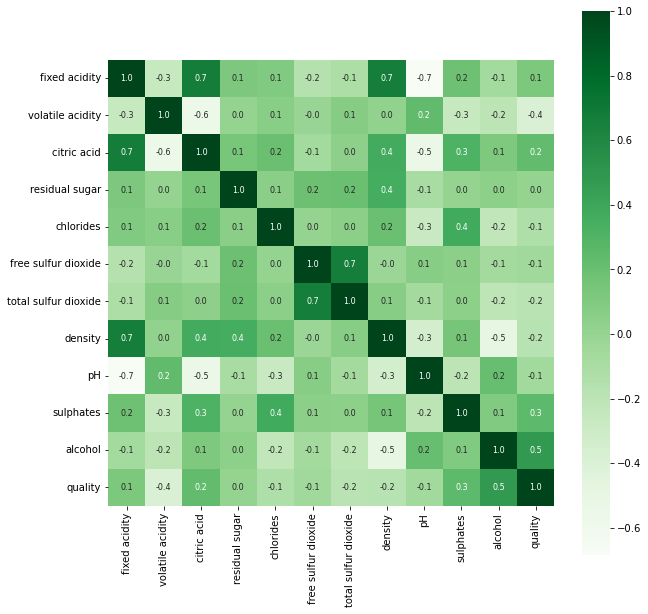

In [246]:
# constructing a heatmap to understand the correlation between the columns

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

### 5.Data Preprocessing

In [247]:
#seperate the data and Label
X=df.drop('quality',axis=1)

In [248]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


#### 5.1 Label Binarizaton

In [249]:
Y=df['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)

In [250]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### 6.Train & Test Split

In [251]:
X_train, X_test, Y_train , Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [252]:
X_train.shape

(1279, 11)

In [253]:
X_test.shape

(320, 11)

In [254]:
Y_train.shape

(1279,)

In [255]:
Y_test.shape

(320,)

In [256]:
Y.shape

(1599,)

### 7.Model Training

## Random Forest Classifier

In [257]:
model=RandomForestClassifier()

In [258]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### 8.Model Evaluation

### Accuracy Score

In [259]:
# accuracy on test data
X_test_pred=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)

In [260]:
print('Model Accuracy: ',test_data_accuracy)

Model Accuracy:  0.93125


### 9.Building a Predictive System

In [261]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
909,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,6
546,7.5,0.550,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6
1018,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
62,7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,7
754,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6


### Positive Result Checking

In [262]:
# Positive Result

input_data=(7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5)

#changing the input data to a numpy array

input_data_as_np=np.asarray(input_data)

#reshape the data 

input_data_reshaped=input_data_as_np.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  message += "Feature names unseen at fit time:\n"


### Negative Result Checking

In [263]:
# Negative Result

input_data=(7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5)

#changing the input data to a numpy array

input_data_as_np=np.asarray(input_data)

#reshape the data 

input_data_reshaped=input_data_as_np.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  message += "Feature names unseen at fit time:\n"


## Thank You !!!